In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bigmart_train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
collist = df.columns.values

for i in collist:
    print(f"the unique value of {i} is \n {df[i].unique()}\n")

the unique value of Item_Identifier is 
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

the unique value of Item_Weight is 
 [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.

Key observation:
1. Catogorical data:
    1. Item_Identifier
    2. Item_Fat_Content --> 
    ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] here (low fat= Low Fat =LF) and (Regular = reg)
    3. Item_Type
    4. Outlet_Identifier
    5. Outlet_Establishment_Year
    6. Outlet_Size
    7. Outlet_Location_Type
    8. Outlet_Type

2. Continous Data:
    1. Item_Weight
    2. Item_Visibility
    3. Item_MRP
    4. Item_Outlet_Sales

In [9]:
df.Item_Fat_Content.replace("low fat", "LF", inplace = True)
df.Item_Fat_Content.replace("Low Fat", "LF", inplace = True)
df.Item_Fat_Content.replace("Regular", "reg", inplace = True)
df.Item_Fat_Content.unique()

array(['LF', 'reg'], dtype=object)

In [12]:
cols = df.columns
num_cols = df._get_numeric_data().columns

non_numeric_cols = list(set(cols)-set(num_cols))
non_numeric_cols

['Item_Identifier',
 'Outlet_Location_Type',
 'Item_Fat_Content',
 'Outlet_Identifier',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Type']

# Encoding the non numeric data with lable encoder:

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
c = ['Outlet_Identifier','Item_Fat_Content',
  'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Identifier',
 'Item_Type']
for i in c:
    df[i] = le.fit_transform(df[i])
    
df 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,NaN,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,High,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,NaN,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,Small,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,Medium,2,2,1845.5976


In [17]:
df.Outlet_Size.replace("Small",0,inplace = True)
df.Outlet_Size.replace("Medium",1,inplace = True)
df.Outlet_Size.replace("High",2,inplace = True)
df.Outlet_Size.astype(float)
df.Outlet_Size.unique()

array([ 1., nan,  2.,  0.])

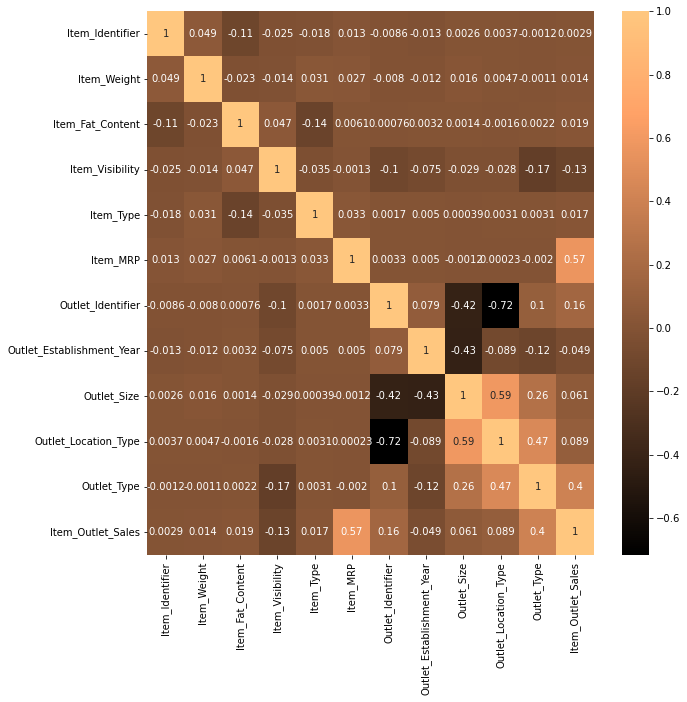

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap= "copper")
plt.show()

Key observation:
1. Outlet_Size has highest correlation with Outlet_Location_Type.
2. item_weight has highest correlation with iteam_identifier and iteam_Fat_Content.

In [24]:
list= []

for i in df.Outlet_Location_Type.unique():
    list.append(i)

for i in range(0,len(list)):
    exec(f'OLT_{i} = df.loc[df.Outlet_Location_Type=={list[i]}]')
    exec(f"OLT_{i}.Outlet_Size.fillna(OLT_{i}['Outlet_Size'].mode()[0], inplace = True)")

DF = pd.concat([OLT_0,OLT_1,OLT_2])
df= DF.sort_index()

In [26]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
list= []

for i in df.Item_Fat_Content.unique():
    list.append(i)
    
for i in range(0,len(list)):
    exec(f'IFC_{i} = df.loc[df.Item_Fat_Content=={list[i]}]')
    exec(f"IFC_{i}.Item_Weight.fillna(IFC_{i}['Item_Weight'].median(), inplace = True)")

DF = pd.concat([IFC_0,IFC_1])
df= DF.sort_index()

In [31]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# We have Removed the null values from our data set lets see the summary of the data.

In [33]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.812991,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,0.611522,1.112871,1.201220,2181.288914
std,449.222377,4.227366,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.675514,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,0.000000,0.000000,1.000000,834.247400
50%,783.000000,12.650000,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,1.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


Key observation:
Continous Data:
1. Item_Weight
2. Item_Visibility
3. Item_MRP
4. Item_Outlet_Sales
All have the mean greater than the median and 75th percentile aand max have huge gap. this identified the outliers present in the data and skewness present in the data.

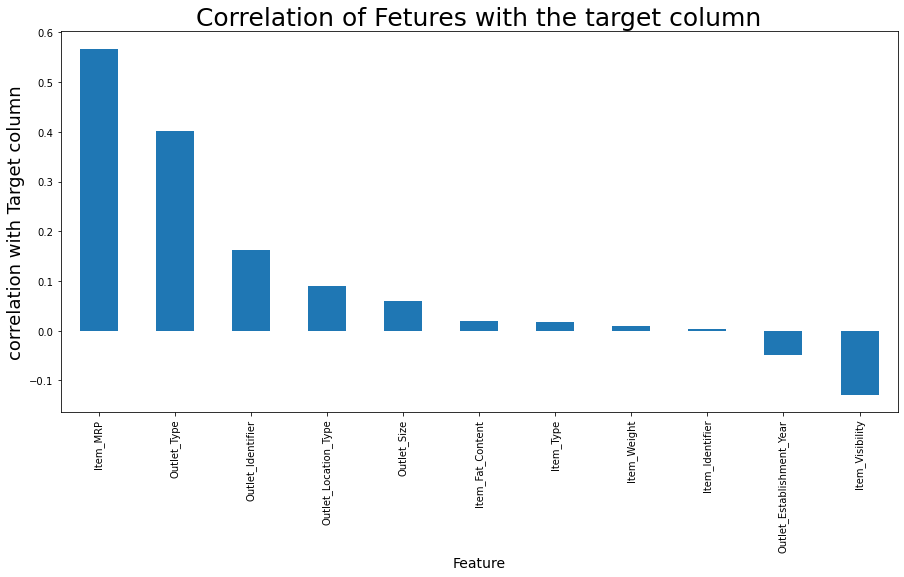

In [36]:
plt.figure(figsize=(15,7))
df.corr()["Item_Outlet_Sales"].sort_values(ascending=False).drop(["Item_Outlet_Sales"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(df.corr()["Item_Outlet_Sales"].sort_values(ascending=False)).drop(["Item_Outlet_Sales"])

In [38]:
print("Key observation:\n", cor)

Key observation:
                            Item_Outlet_Sales
Item_MRP                            0.567574
Outlet_Type                         0.401522
Outlet_Identifier                   0.162325
Outlet_Location_Type                0.089367
Outlet_Size                         0.060517
Item_Fat_Content                    0.018719
Item_Type                           0.017048
Item_Weight                         0.009574
Item_Identifier                     0.002869
Outlet_Establishment_Year          -0.049135
Item_Visibility                    -0.128625


Item_MRP, Outlet_Type have higher correlation which means that the sales will be good if the outlet is bigger which is logically also true

In [41]:
agro1="#07fa60"
agro2="#78fcac"
agro3="#8cc894"
agro4="#345434"
agro5="#067528"

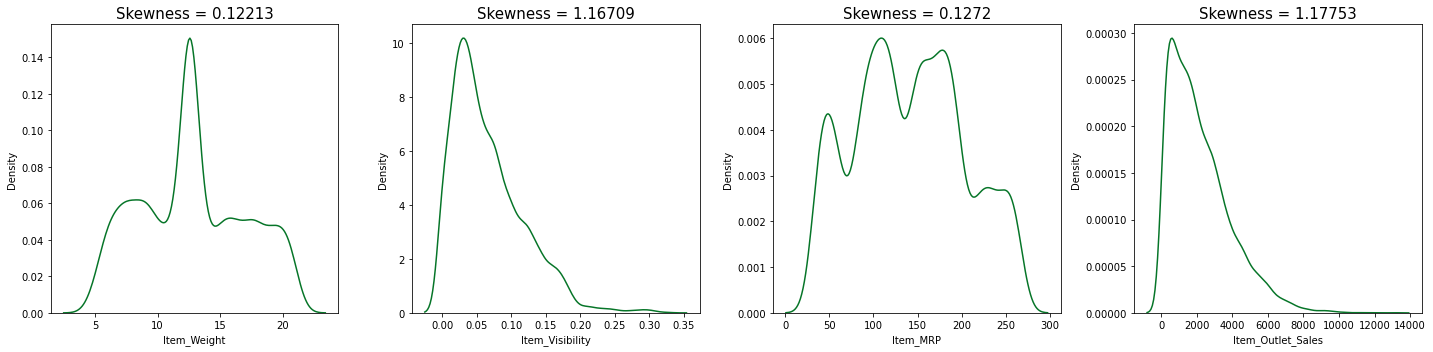

In [45]:
plt.figure(figsize=(20,5))
collist = ["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]
for i in range (0, len(collist)):
    plt.subplot(1,4,i+1)         
    sns.kdeplot(df[collist[i]], color = agro5)
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA


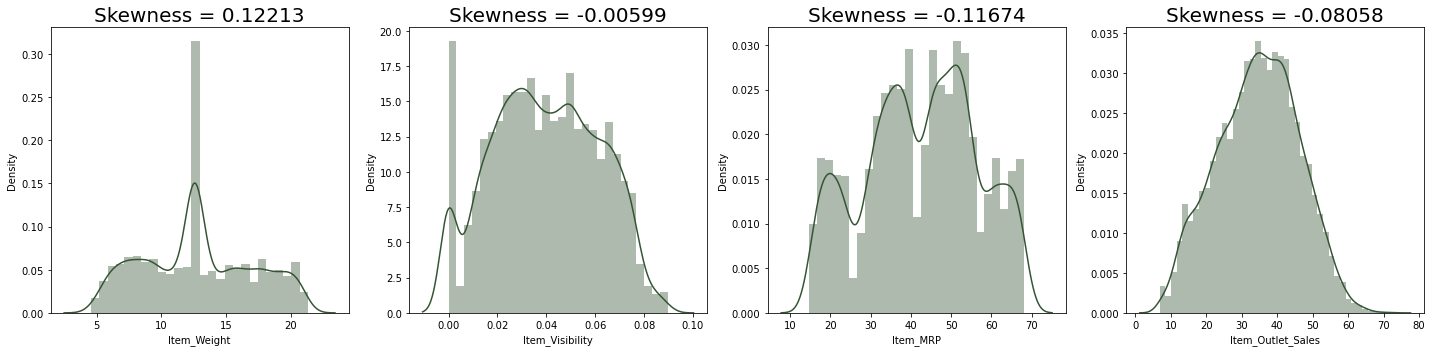

In [50]:
DF=df

from scipy.stats import yeojohnson

skew = ["Item_Visibility","Item_MRP","Item_Outlet_Sales"] 

for i in skew:
    DF[i]= yeojohnson(DF[i])[0]
    
print("BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA")
plt.figure(figsize=(20,5))
for i in range (0, len(collist)):
    plt.subplot(1,4,i+1)
    plt.title(f"Skewness = {round(DF[collist[i]].skew(),5)}",fontsize=20)         
    sns.distplot(DF[collist[i]], color = agro4)
    plt.tight_layout() 

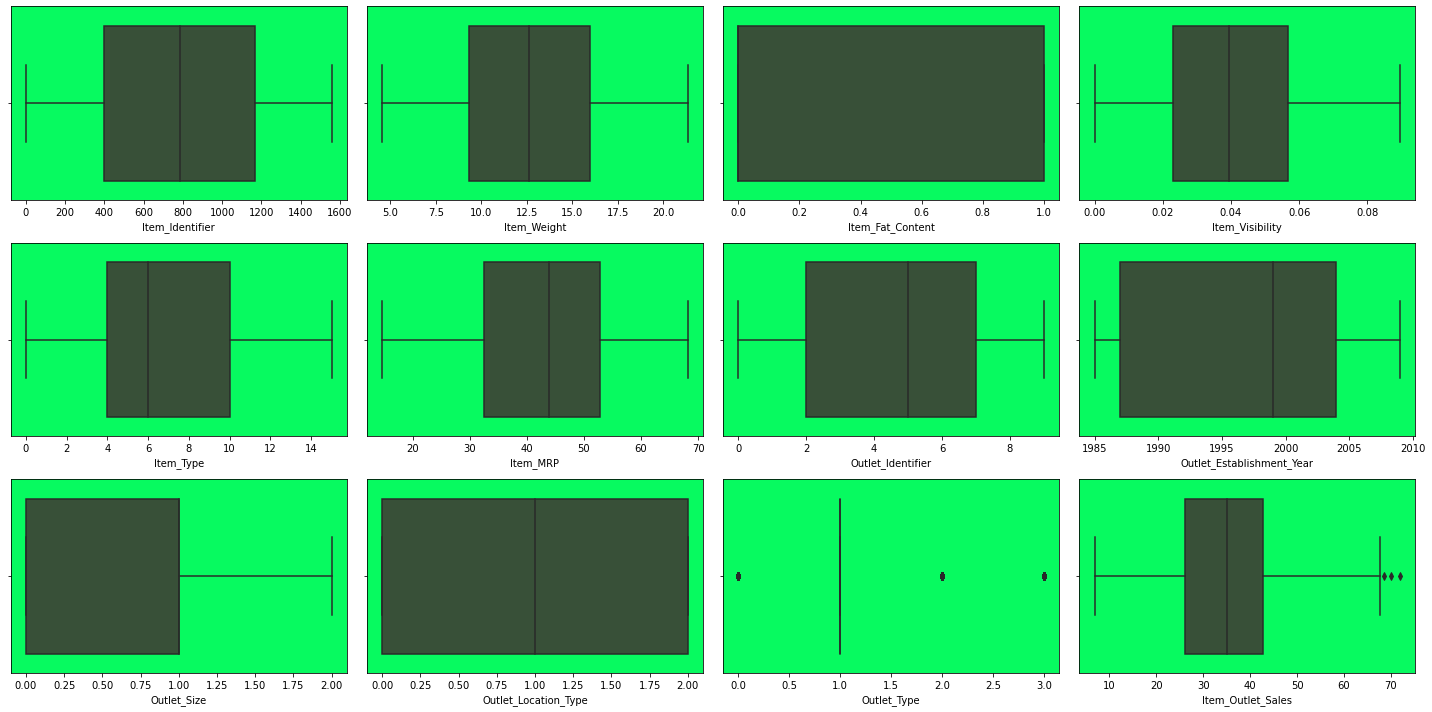

In [53]:
plt.figure(figsize=(20,10))
collist = DF.columns.values
for i in range (0, len(collist)):
    plt.subplot(3,4,i+1)
    ax=sns.boxplot(DF[collist[i]], color = agro4 , orient = "h")
    ax.set_facecolor(agro1)
    plt.tight_layout()

The above observation Identifies there are outliers present in the dataset lets figure out how to remove them
Z-Score method

In [56]:
from scipy.stats import zscore

z= np.abs(zscore(DF))
threshold= 3
df_new = DF[(z < 3).all(axis=1)]

In [58]:
print(f"Orginal Data {DF.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((8523-8521)/8523)*100}%")

Orginal Data (8523, 12)
After Removing outliers (8521, 12)
The percentage of data loss 0.02346591575736243%


In [59]:
df= df_new

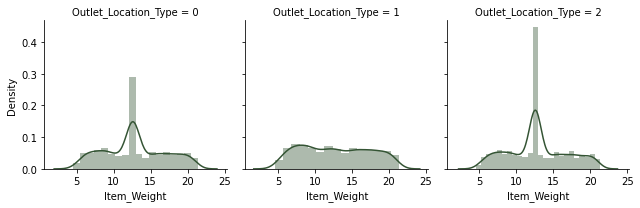

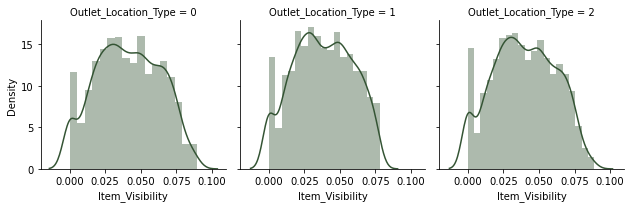

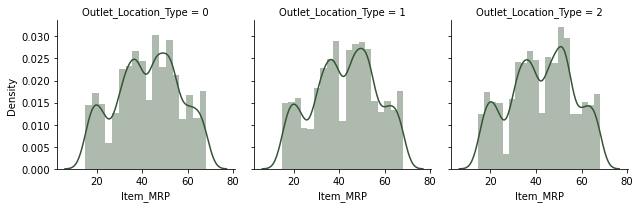

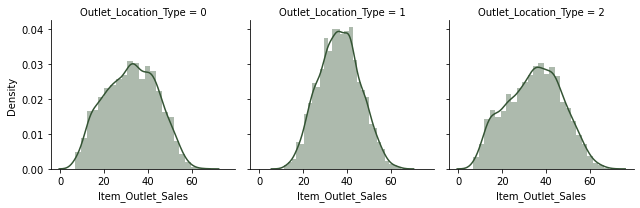

In [62]:
feature_var = ["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]

for i in feature_var:
    facet= sns.FacetGrid(df,col="Outlet_Location_Type")
    facet.map(sns.distplot,i,color = agro4)
    plt.show()

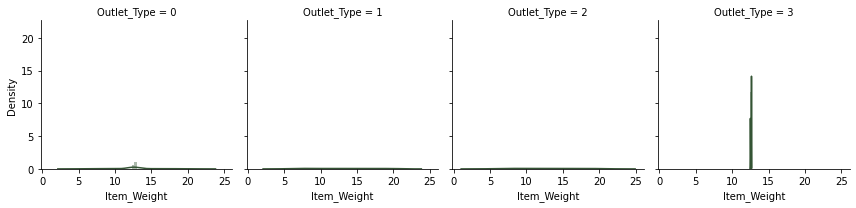

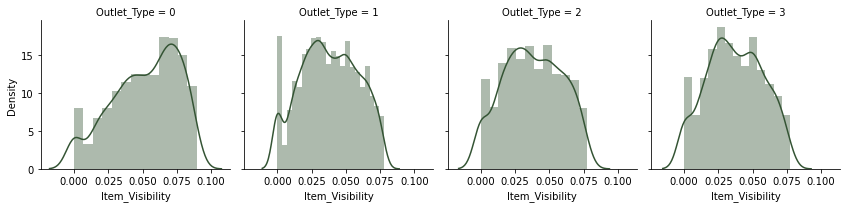

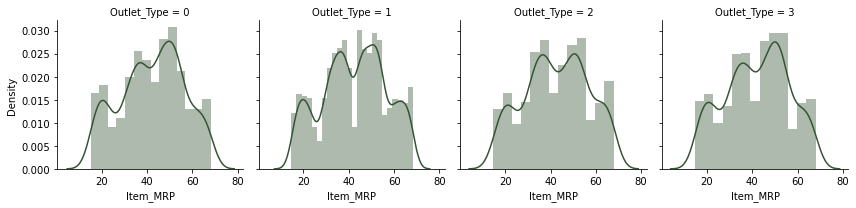

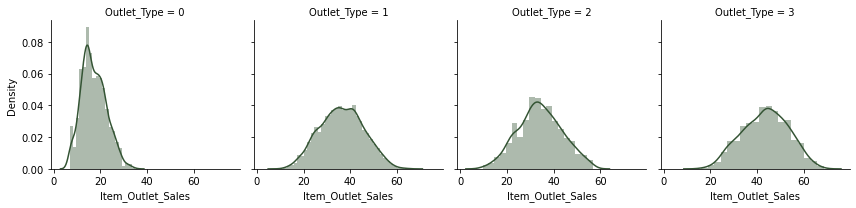

In [64]:
feature_var = ["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]

for i in feature_var:
    facet= sns.FacetGrid(df,col="Outlet_Type")
    facet.map(sns.distplot,i,color = agro4)
    plt.show()

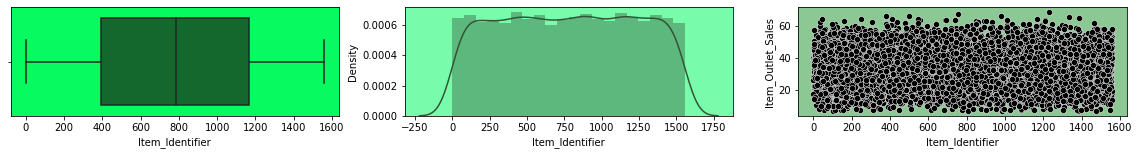

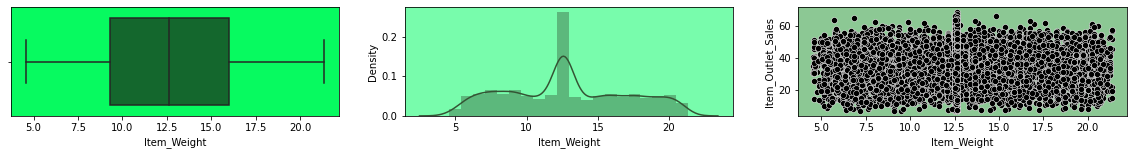

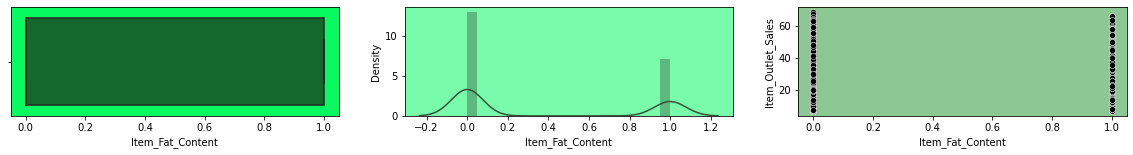

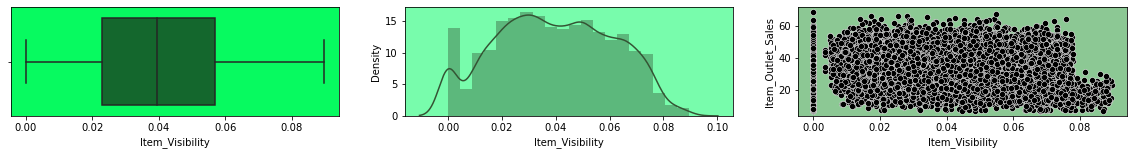

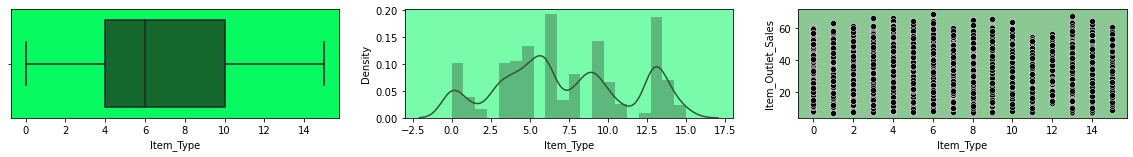

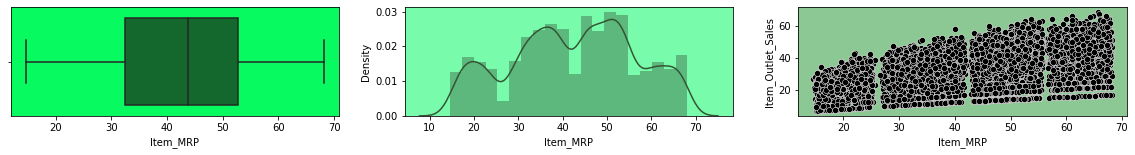

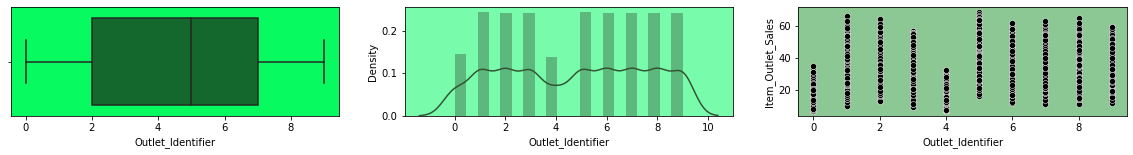

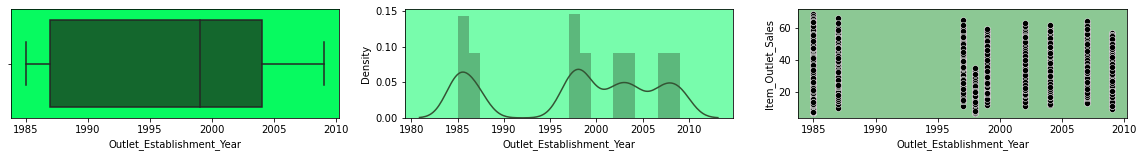

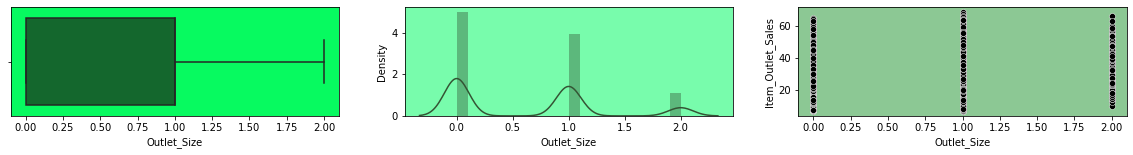

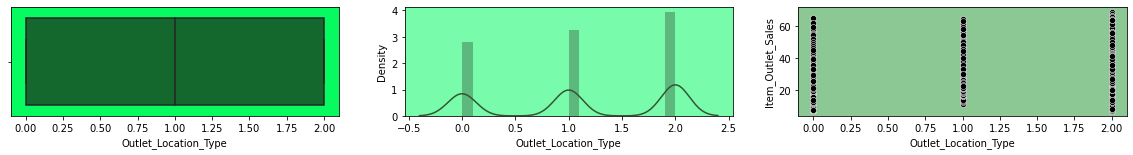

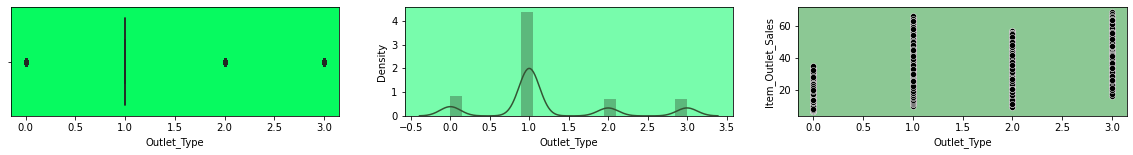

In [67]:
target_variable = 'Item_Outlet_Sales'
feature_variable = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', ]


def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 2))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=agro5)
    a1.set_facecolor(agro1)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=agro4)
    a2.set_facecolor(agro2)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable, ax=axs[2], color="k")
    a3.set_facecolor(agro3)
    plt.show()
    
for i in feature_variable:
    num_plots(i) 

In [70]:
 from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
df[["Item_Weight","Item_Visibility","Item_MRP"]] = sc.fit_transform(df[["Item_Weight","Item_Visibility","Item_MRP"]])

In [72]:
x_1=df.drop(["Item_Outlet_Sales"], axis = 1)
y_1=df.Item_Outlet_Sales

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 60.02094338002867 found on randomstate 637


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [77]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [79]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestR"]

In [82]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train_1,y_train_1)
    print("Score of", m, "is:", m.score(x_train_1,y_train_1))
    score.append(m.score(x_train_1,y_train_1))
    predm=m.predict(x_test_1)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test_1,predm))
    mean_abs_e.append(mean_absolute_error(y_test_1,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test_1,predm))
    mean_sqr_e.append(mean_squared_error(y_test_1,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test_1,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test_1,predm)))
    print("R2 SCORE: ", r2_score(y_test_1,predm))
    r2.append(r2_score(y_test_1,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.5683409529040218

ERROR:
MEAN ABSOLUTE ERROR:  6.156305069100329
MEAN SQUARED ERROR:  59.018661823232776
ROOT MEAN SQUARED ERROR : 7.682360433046133
R2 SCORE:  0.5613744725742424
**********************************************************************************************************



Score of Lasso() is: 0.539824295768204

ERROR:
MEAN ABSOLUTE ERROR:  6.4345028773604245
MEAN SQUARED ERROR:  63.08192678111205
ROOT MEAN SQUARED ERROR : 7.942413158550243
R2 SCORE:  0.5311763677687076
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.5683408868906837

ERROR:
MEAN ABSOLUTE ERROR:  6.156361002169577
MEAN SQUARED ERROR:  59.018343915521264
ROOT MEAN SQUARED ERROR : 7.6823397422609
R2 SCORE:  0.5613768352580669
**********************************************************************************************************



Score of ElasticNet() is: 0.4681

In [85]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS:
SCORE IS: [0.576797   0.57820667 0.543109   0.55488952 0.57161091]
MEAN OF SCORE is : 0.564922618150192
Standard Deviation : 0.013701802799928836
**************************************************************************************************



SCORE OF Lasso() IS:
SCORE IS: [0.5438401  0.5476167  0.52831284 0.52753144 0.54106839]
MEAN OF SCORE is : 0.5376738965352507
Standard Deviation : 0.008232896141256546
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS:
SCORE IS: [0.57678962 0.57819779 0.54311705 0.55489184 0.57161922]
MEAN OF SCORE is : 0.5649231054184733
Standard Deviation : 0.013696713920927452
**************************************************************************************************



SCORE OF ElasticNet() IS:
SCORE IS: [0.46935226 0.47612485 0.46254171 0.4535934  0.47028436]
MEAN OF SCORE is : 0.4663793159245008
Standard Deviation : 0.00

In [88]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="SCORE", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
6,DecisionTreeRegressor,1.000000,0.368217,0.026625,7.091955,84.641495,9.200081,0.370946
8,RandomForestR,0.952779,0.656042,0.009609,5.182130,45.429236,6.740121,0.662371
7,AdaBoostRegressor,0.665611,0.659298,0.009169,5.240784,44.557068,6.675108,0.668853
0,LinearRegression,0.568341,0.564923,0.013702,6.156305,59.018662,7.682360,0.561374
2,Ridge,0.568341,0.564923,0.013697,6.156361,59.018344,7.682340,0.561377
1,Lasso,0.539824,0.537674,0.008233,6.434503,63.081927,7.942413,0.531176
3,ElasticNet,0.468167,0.466379,0.007711,6.999747,72.339203,8.505246,0.462376
5,KNeighborsRegressor,0.435558,0.133570,0.008524,8.648897,117.856836,10.856189,0.124090
4,SVR,-0.001433,-0.003282,0.003420,9.524879,134.979192,11.618055,-0.003163


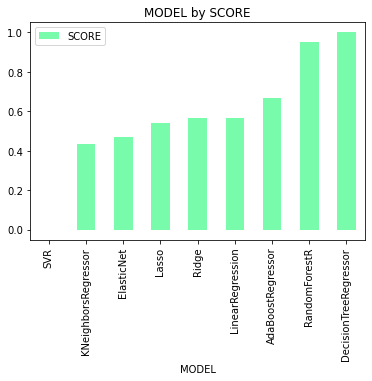

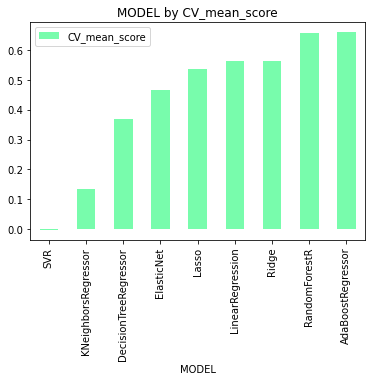

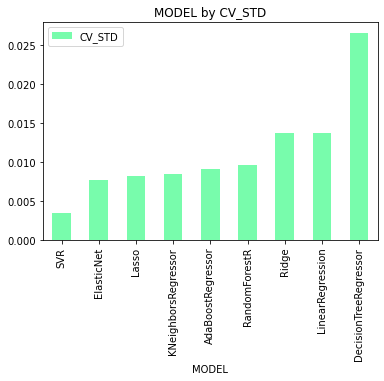

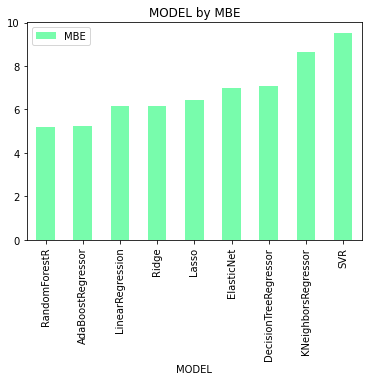

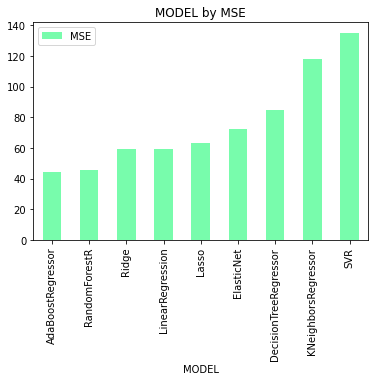

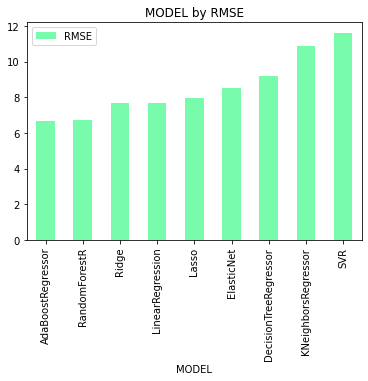

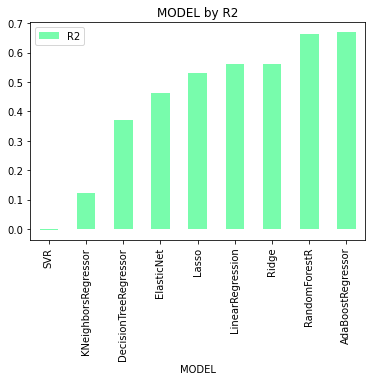

In [91]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = agro2)
    plt.title(f"MODEL by {metric}")
    plt.show()

In [92]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train_1, y_train_1, cv=5, n_jobs=-1).mean()

34.47954216420131

In [93]:
rf.fit(x_train_1, y_train_1)

RandomForestRegressor(random_state=42)

In [94]:
rf.score(x_train_1, y_train_1)

0.952778798812728

In [95]:
y_train_1

7090    20.446471
6013    19.641284
2987    48.256116
3517    28.844551
8458    20.735105
          ...    
8411    48.728235
7585     8.271204
8419    27.471650
5833    33.723880
481     42.505363
Name: Item_Outlet_Sales, Length: 6390, dtype: float64

In [100]:
import joblib
joblib.dump(rf,"Outlet_Sales.obj")

['Outlet_Sales.obj']

In [102]:
df1 = pd.read_csv("bigmart_test.csv")
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [103]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [105]:
df1.Item_Fat_Content.replace("low fat", "LF", inplace = True)
df1.Item_Fat_Content.replace("Low Fat", "LF", inplace = True)
df1.Item_Fat_Content.replace("Regular", "reg", inplace = True)
df1.Item_Fat_Content.unique()

array(['LF', 'reg'], dtype=object)

In [107]:
c = ['Outlet_Identifier','Item_Fat_Content',
  'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Identifier',
 'Item_Type']
for i in c:
    df1[i] = le.fit_transform(df1[i])
    
df1 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,Medium,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,NaN,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,NaN,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,NaN,1,1
4,1184,NaN,1,0.118599,4,234.2300,5,1985,Medium,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,1,0.013496,13,141.3154,8,1997,Small,0,1
5677,306,7.600,1,0.142991,15,169.1448,3,2009,Medium,2,2
5678,1412,10.000,0,0.073529,8,118.7440,7,2002,NaN,1,1
5679,517,15.300,1,0.000000,3,214.6218,2,2007,NaN,1,1


In [109]:

df1.Outlet_Size.replace("Small",0,inplace = True)
df1.Outlet_Size.replace("Medium",1,inplace = True)
df1.Outlet_Size.replace("High",2,inplace = True)
df1.Outlet_Size.astype(float)
df1.Outlet_Size.unique()

array([ 1., nan,  0.,  2.])

In [111]:
list= []

for i in df1.Outlet_Location_Type.unique():
    list.append(i)

for i in range(0,len(list)):
    exec(f'OLT_{i} = df1.loc[df1.Outlet_Location_Type=={list[i]}]')
    exec(f"OLT_{i}.Outlet_Size.fillna(OLT_{i}['Outlet_Size'].mode()[0], inplace = True)")

DF = pd.concat([OLT_0,OLT_1,OLT_2])
df1= DF.sort_index()

In [114]:
list= []

for i in df1.Item_Fat_Content.unique():
    list.append(i)
    
for i in range(0,len(list)):
    exec(f'IFC_{i} = df1.loc[df1.Item_Fat_Content=={list[i]}]')
    exec(f"IFC_{i}.Item_Weight.fillna(IFC_{i}['Item_Weight'].median(), inplace = True)")

DF = pd.concat([IFC_0,IFC_1])
df1= DF.sort_index()

In [116]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [118]:
skew = ["Item_Visibility","Item_MRP"] 

for i in skew:
    df1[i]= yeojohnson(df1[i])[0]

In [120]:
sc= StandardScaler()
df1[["Item_Weight","Item_Visibility","Item_MRP"]] = sc.fit_transform(df1[["Item_Weight","Item_Visibility","Item_MRP"]])
    

In [122]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1.909178,0,-1.500870,13,-0.471636,9,1999,1.0,0,1
1,1067,-1.020083,1,-0.424536,4,-0.835771,2,2007,0.0,1,1
2,1406,0.462194,0,0.880104,11,1.524788,0,1998,1.0,2,0
3,809,-1.251836,0,-1.190293,13,0.291168,2,2007,0.0,1,1
4,1184,-0.196596,1,1.146354,4,1.424049,5,1985,1.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,-0.502463,1,-1.262760,13,0.077954,8,1997,0.0,0,1
5677,306,-1.184780,1,1.424105,15,0.504378,3,2009,1.0,2,2
5678,1412,-0.620104,0,0.423731,8,-0.287662,7,2002,0.0,1,1
5679,517,0.626891,1,-1.830456,3,1.156583,2,2007,0.0,1,1


In [123]:
Sales_model= joblib.load('Outlet_Sales.obj')
prediction = Sales_model.predict(df1)
prediction

array([32.62024817, 31.24448963, 25.55575026, ..., 34.17925556,
       46.77721075, 30.91769903])

In [125]:
Predicted_Iteam_Outlet_sales=pd.DataFrame({"Pred_Item_Outlet_Sales":prediction})
Predicted_Iteam_Outlet_sales

,Pred_Item_Outlet_Sales
0,32.620248
1,31.244490
2,25.555750
3,36.211280
4,49.761180
...,...
5676,41.103081
5677,39.085807
5678,34.179256
5679,46.777211
